<a href="https://colab.research.google.com/github/hhnnhh/berlin_datascience_lab/blob/master/EDA/EDA_On_Board_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 
by Caitlin Duncan and Hannah Bohle
1. overall results
2. OBD_results
3. stations
4. OBD II results and station ID
5. OBD variables and distributions

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/WIMLDS/'

In [ ]:
cars2 = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')
str_cars2 = pd.read_csv(data_path + 'sample.csv', dtype=str, parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,18,26,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from scipy import stats
cars2[(np.abs(stats.zscore(cars)) < 3).all(axis=1)]

In [ ]:
len(cars2.columns)

In [ ]:
list(cars2)

In [ ]:
slice_col = cars2.columns[69]

In [ ]:
cars2_df = cars2.loc[:, slice_col:]
cars2_str_df = str_cars2.loc[:, slice_col:]

In [ ]:
cars2_df["VIN"] = cars2["VIN"]

In [ ]:
list(cars2_df)

In [ ]:
cars2_df.info()

"OBDII_AFFECT_OVERALL" -> Determines if a failing OBD-II test causes the overall emissions test to fail - number of YES in this column should be less than or equal to the number of fails in the OVERALL_RESULTS column

In [ ]:
cars2_df.OBDII_AFFECT_OVERALL.value_counts()


N    157846
Y     10686
I         1
Name: OBDII_AFFECT_OVERALL, dtype: int64

In [ ]:
cars2_df.OVERALL_RESULT.value_counts()

P    190323
A     24486
F     20352
I         9
O         6
Name: OVERALL_RESULT, dtype: int64

The "Visual Smoke Check" - two variables, with 1 Char (P=Pass, F=Fail, N=? missing?) 

Citation from the inspector manual (p. 23)
: "The presence of tailpipe smoke anytime during the emission test results in a 'Fail' test.
Visible smoke often indicates major engine problems and the need for repairs.
No vehicle shall be failed for water vapor condensation or steam."


In [ ]:
cars2_df.V_SMOKE1.value_counts()

P    168796
N     65889
F       491
Name: V_SMOKE1, dtype: int64

In [ ]:
cars2_df.V_SMOKE2.value_counts()

N    144962
P     89994
F       220
Name: V_SMOKE2, dtype: int64

# OBD Data
OBD refers to "On-Board Diagnostics"

Cars made in 1996 or later have standardized computer systems, known as OBD-II that continually monitor the electronic sensors of engines and emissions control systems, including the catalytic converter, while the vehicle is being driven to ensure they are working as designed.Source:ctemissions.com/test-procedures/what-is-obd

In other words, it is the vehicle's self-diagnostic and reporting capability. OBD systems give the vehicle owner or repair technician access to the status of the various vehicle sub-systems. 
source: wikipedia.org

tl;dr

OBD = On-Board Diagnostic. It allows other electronics to access the car's internal computer, which keeps track of how well things are working. 

In [ ]:
list(cars2_df)

['V_SMOKE1',
 'V_SMOKE2',
 'V_GASCAP',
 'V_CAT',
 'V_RESULT',
 'KOEO_RESULT',
 'KOER_RESULT',
 'OBD_RDY_MISFIRE',
 'OBD_RDY_FUEL',
 'OBD_RDY_COMPONENT',
 'OBD_RDY_CAT',
 'OBD_RDY_CAT_HEATED',
 'OBD_RDY_EVAP',
 'OBD_RDY_SEC_AIR',
 'OBD_RDY_AIR_COND',
 'OBD_RDY_O2_SENSOR',
 'OBD_RDY_O2_HEATER',
 'OBD_RDY_EGR',
 'OBD_RDY_RESULT',
 'OBD_PID',
 'OBD_PCM_ID',
 'OBD_VIN',
 'OBD_FLT_CODES',
 'OBD_FLT_RESULT',
 'OBD_MIL_STATUS',
 'OBD_RESULT',
 'ONLINE_STATUS',
 'OFFLINE_REASON_CODE',
 'ABORT_CODE',
 'SOFTWARE_VERSION',
 'INSP_COMMENTS',
 'OVERALL_RESULT',
 'R_TOTAL_COST',
 'R_EGR',
 'R_ELECTRICAL',
 'R_EVAP_CONTROL',
 'R_EXHAUST',
 'R_IGNITION',
 'R_INTAKE',
 'R_ENGINE',
 'R_PCV',
 'R_OTHER',
 'SentToWW',
 'ABORT_CODE_OTHER_DESC',
 'OBDII_AFFECT_OVERALL',
 'E_HIGH_CO_RESULT',
 'E_HIGH_HC_RESULT',
 'E_IDLE_CO_RESULT',
 'E_IDLE_HC_RESULT',
 'MECHANIC_LAST_NAME',
 'MECHANIC_FIRST_NAME',
 'MECHANIC_MIDDLE_INIT',
 'ENGINE_SIZE_ORIG',
 'FAILED_IDLE_RPM',
 'SENTTOVID',
 'Station_License_Number',
 'An

In [ ]:
# get just obd columns + final result column
obd_cols = [col for col in cars2_df if col.startswith('OBD') or col.startswith('OVERALL_')]

In [ ]:
print(f'there are {len(obd_cols)-1} obd columns and 1 final result column')

there are 20 obd columns and 1 final result column


In [ ]:
obd_cols

['OBD_RDY_MISFIRE',
 'OBD_RDY_FUEL',
 'OBD_RDY_COMPONENT',
 'OBD_RDY_CAT',
 'OBD_RDY_CAT_HEATED',
 'OBD_RDY_EVAP',
 'OBD_RDY_SEC_AIR',
 'OBD_RDY_AIR_COND',
 'OBD_RDY_O2_SENSOR',
 'OBD_RDY_O2_HEATER',
 'OBD_RDY_EGR',
 'OBD_RDY_RESULT',
 'OBD_PID',
 'OBD_PCM_ID',
 'OBD_VIN',
 'OBD_FLT_CODES',
 'OBD_FLT_RESULT',
 'OBD_MIL_STATUS',
 'OBD_RESULT',
 'OVERALL_RESULT',
 'OBDII_AFFECT_OVERALL']

### Distribution of overall results

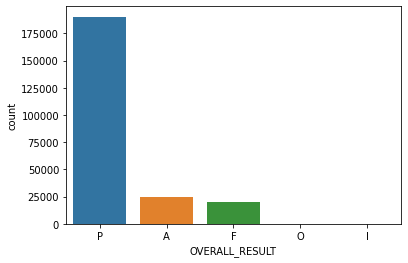

value counts are as follows: 


P    190323
A     24486
F     20352
I         9
O         6
Name: OVERALL_RESULT, dtype: int64

In [ ]:
sns.countplot(x='OVERALL_RESULT', data=cars2_df)
plt.show()
print('value counts are as follows: ')
cars2_df['OVERALL_RESULT'].value_counts()

### Distribution of scores for `OBD_RESULTS`

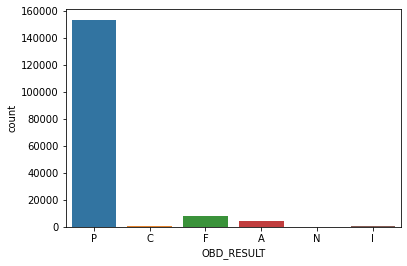

value counts are as follows: 


P    153506
F      8026
A      4365
C       555
I       370
N       234
Name: OBD_RESULT, dtype: int64

In [ ]:
sns.countplot(x='OBD_RESULT', data=cars2_df)
plt.show()
print('value counts are as follows: ')
cars2_df['OBD_RESULT'].value_counts()

There are considerably fewer cars that pass the OBD test than the overall test. This could mean that some cars who fail the OBD test managed to pass the overall test (although from what I've read online this shouldn't happen). 

This information, however, is contained in the `OBDII_AFFECT_OVERALL` variable: this variable determines if failing an OBDII test will cause the overall result to be a fail (Y=yes, N=no).

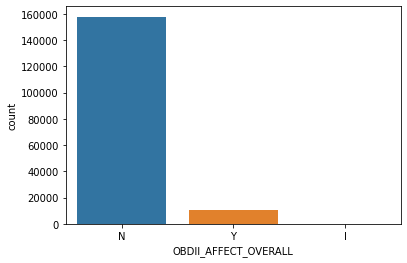

value counts are as follows: 


N    157846
Y     10686
I         1
Name: OBDII_AFFECT_OVERALL, dtype: int64

In [ ]:
sns.countplot(x='OBDII_AFFECT_OVERALL', data=cars2_df)
plt.show()
print('value counts are as follows: ')
cars2_df['OBDII_AFFECT_OVERALL'].value_counts()

The overwhelming majority indicates that failing an OBDII test will NOT cause the overall result to be a fail. 

This means that failing the OBDII test on its own is not necessarly a good indicator of failing/passing the overall test. 

Not sure if this particular value is based on a threshold that the mechanic/testing station sets, or if it is a measure of likeliness to fail. 

Could look at this variable & the mechanic/station policy to see if this is dependent on the mechanic or not. 



### Are some stations "nicer" than others? Compare OBDII results with station ID

Can then look at individual mechanics within each station.

In [ ]:
len(cars2_df['Station_License_Number'].unique())

228

For each station, get the proportion of passes.

the `normalize=true` will automatically calculate proportions for us! 

In [ ]:
test = cars2_df.groupby('Station_License_Number').OBD_RESULT.value_counts(normalize=True)

In [ ]:
test.head()

Station_License_Number  OBD_RESULT
3250                    P             1.000000
969                     P             0.916667
                        F             0.083333
CCAIS                   P             1.000000
FG002                   P             0.871134
Name: OBD_RESULT, dtype: float64

In [ ]:
test_unstacked = test.unstack()

In [ ]:
test_unstacked.head()

OBD_RESULT,A,C,F,I,N,P
Station_License_Number,,,,,,
3250,NaN,NaN,NaN,NaN,NaN,1.000000
969,NaN,NaN,0.083333,NaN,NaN,0.916667
CCAIS,NaN,NaN,NaN,NaN,NaN,1.000000
FG002,0.092784,0.020619,0.015464,NaN,NaN,0.871134
FG008,0.054348,0.010870,NaN,0.01087,NaN,0.923913


In [ ]:
test_unstacked['P'].reset_index()

,Station_License_Number,P
0,3250,1.000000
1,969,0.916667
2,CCAIS,1.000000
3,FG002,0.871134
4,FG008,0.923913
...,...,...
221,IS500,0.941176
222,IS503,1.000000
223,N1234,0.888889
224,VP001,0.797688


In [ ]:
#test_unstacked.reset_index()

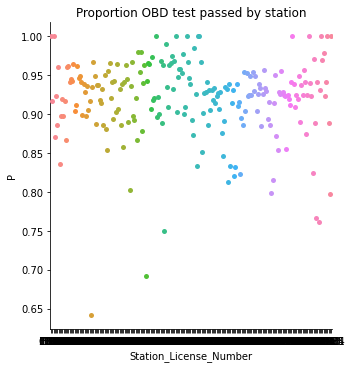

In [ ]:
sns.catplot(x='Station_License_Number', y = 'P', data=test_unstacked['P'].reset_index())
plt.title('Proportion OBD test passed by station')
plt.show()

## OBDII Variables and their Distributions

Columns "OBD_RDY_MISFIRE" through "OBD_RDY_RESULT" (12 columns) are all categorical (nomimal, possibly ordinal) with the following possible values:

0, 1, 2, 3, 4, 5

**Have still not been able to find out what these codes mean.**

In [ ]:
# get the obd data
obd_df = cars2_df[obd_cols]

In [ ]:
obd_df.head()

,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,OVERALL_RESULT,OBDII_AFFECT_OVERALL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
1,1.0,1.0,4.0,1.0,0.0,5.0,0.0,3.0,4.0,1.0,0.0,P,6.0,NaN,NaN,NaN,P,1.0,P,P,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
4,1.0,1.0,4.0,1.0,0.0,3.0,0.0,3.0,4.0,1.0,1.0,P,16.0,10,NaN,P0300,F,1.0,P,P,N


### Distribution for `OBD_RDY_MISFIRE` = OBDII Readiness Monitor Misfire Sensor

Note that the value 5 does not appear although it s a possible value.

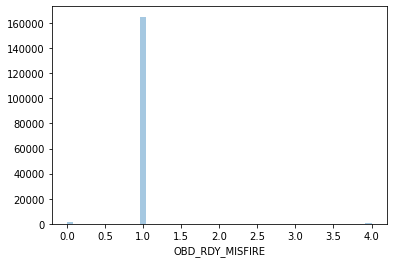

value counts are as follows: 


1.0    164841
0.0      1171
4.0      1072
2.0        22
3.0         2
Name: OBD_RDY_MISFIRE, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_MISFIRE'], kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_MISFIRE'].value_counts()

### Distribution for `OBD_RDY_FUEL` = OBDII readiness monitor fuel system monitoring sensor

Note that the value 5 does not appear although it s a possible value.

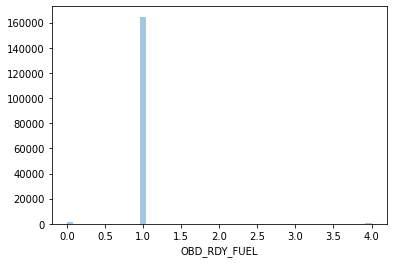

value counts are as follows: 


1.0    164663
0.0      1236
4.0      1072
2.0       135
3.0         2
Name: OBD_RDY_FUEL, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_FUEL'], kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_FUEL'].value_counts()

### Distribution for `OBD_RDY_COMPONENT` = OBDII readiness monitor component

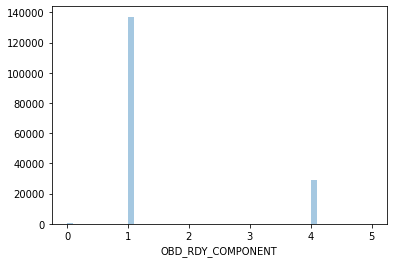

value counts are as follows: 


1.0    137055
4.0     28902
0.0       778
3.0       250
2.0       107
5.0        16
Name: OBD_RDY_COMPONENT, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_COMPONENT'], kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_COMPONENT'].value_counts()

### Distribution for `OBD_RDY_CAT` = OBDII readiness monitor catalyst

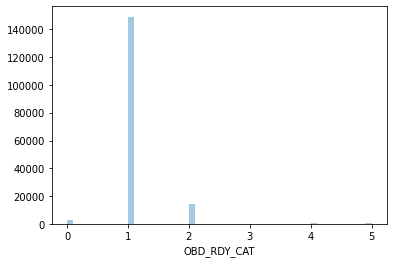

value counts are as follows: 


1.0    149061
2.0     14146
0.0      2827
4.0       567
5.0       500
3.0         7
Name: OBD_RDY_CAT, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_CAT'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_CAT'].value_counts()

### Distribution for `OBD_RDY_CAT_HEATED` = OBDII readiness monitor heated catalyst

Note that values 4 and 5 do not appear although they are possible values

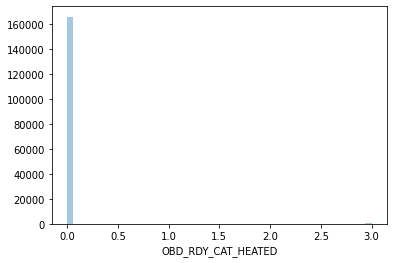

value counts are as follows: 


0.0    165946
3.0      1074
1.0        74
2.0        14
Name: OBD_RDY_CAT_HEATED, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_CAT_HEATED'], kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_CAT_HEATED'].value_counts()


### Distribution for `OBD_RDY_EVAP` = OBDII Readiness Monitor Evaporative System

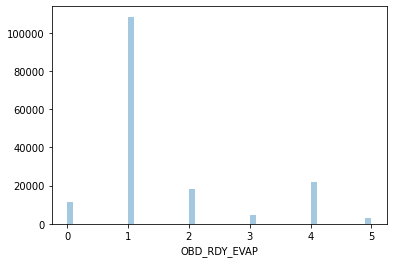

value counts are as follows: 


1.0    108368
4.0     21744
2.0     18278
0.0     11276
3.0      4503
5.0      2939
Name: OBD_RDY_EVAP, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_EVAP'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_EVAP'].value_counts()

### Distribution for `OBD_RDY_SEC_AIR` = OBDII Readiness Secondary Air system

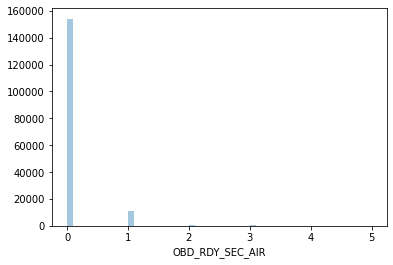

value counts are as follows: 


0.0    154017
1.0     11116
3.0       910
2.0       901
4.0        86
5.0        78
Name: OBD_RDY_SEC_AIR, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_SEC_AIR'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_SEC_AIR'].value_counts()

### Distribution for `OBD_RDY_AIR_COND` = OBDII readiness monitor AC System Refrigerant

Note that 5 does not appear although it is a possible value

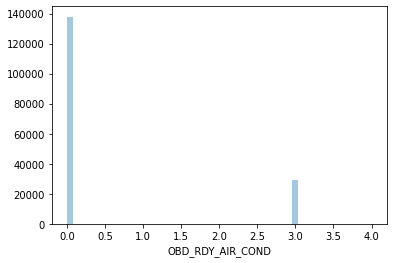

value counts are as follows: 


0.0    137885
3.0     29166
1.0        55
4.0         2
Name: OBD_RDY_AIR_COND, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_AIR_COND'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_AIR_COND'].value_counts()

### Distribution for `OBD_RDY_O2_SENSOR` = OBDII readiness monitor oxygen sensor

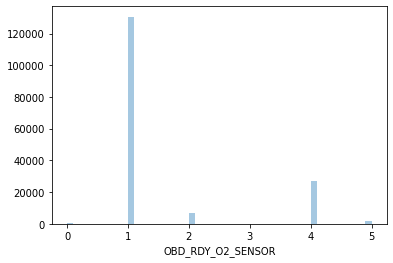

value counts are as follows: 


1.0    130577
4.0     27017
2.0      6706
5.0      2037
0.0       657
3.0       114
Name: OBD_RDY_O2_SENSOR, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_O2_SENSOR'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_O2_SENSOR'].value_counts()

### Distribution for `OBD_RDY_O2_HEATER` = OBDII readiness monitor oxygen sensor heater

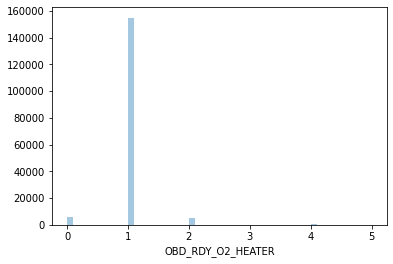

value counts are as follows: 


1.0    154878
0.0      5790
2.0      5366
4.0       851
5.0       173
3.0        50
Name: OBD_RDY_O2_HEATER, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_O2_HEATER'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_O2_HEATER'].value_counts()

### Distribution for `OBD_RDY_EGR` = OBDII readiness monitor EGR system

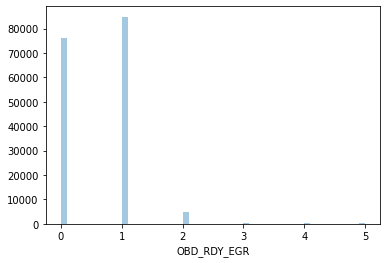

value counts are as follows: 


1.0    84853
0.0    76234
2.0     4947
4.0      473
3.0      326
5.0      275
Name: OBD_RDY_EGR, dtype: int64

In [ ]:
sns.distplot(obd_df['OBD_RDY_EGR'],kde=False)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_EGR'].value_counts()

### Distribution for `OBD_RDY_RESULT` = OBDII readiness result

**NOTE** In the meta-data this is listed as having values 0-5,  but it actually has `P`, `F` and `A`

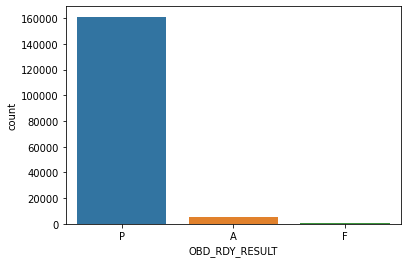

value counts are as follows: 


P    161145
A      5527
F       436
Name: OBD_RDY_RESULT, dtype: int64

In [ ]:
#sns.distplot(obd_df['OBD_RDY_RESULT'],kde=False)
#plt.show()
# use a countplot for this. 
sns.countplot(x='OBD_RDY_RESULT', data=obd_df)
plt.show()
print('value counts are as follows: ')
obd_df['OBD_RDY_RESULT'].value_counts()

In [ ]:
#the REPAIR data
r_cols = [col for col in cars2_df if col.startswith('R_')]

In [ ]:
list(r_cols)

['R_TOTAL_COST',
 'R_EGR',
 'R_ELECTRICAL',
 'R_EVAP_CONTROL',
 'R_EXHAUST',
 'R_IGNITION',
 'R_INTAKE',
 'R_ENGINE',
 'R_PCV',
 'R_OTHER']

In [ ]:
# get the r data
r_df = cars2_df[r_cols]
r_df.head()

,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#the data seems to contain lots of NaN - how much is it?
# calculating percentage of NaN
100 * r_df.isnull().sum(axis = 0)/len(r_df)


R_TOTAL_COST      96.983974
R_EGR             99.868184
R_ELECTRICAL      99.759755
R_EVAP_CONTROL    99.442548
R_EXHAUST         99.831616
R_IGNITION        99.610081
R_INTAKE          99.530992
R_ENGINE          99.947274
R_PCV             99.951526
R_OTHER           98.435646
dtype: float64

In [ ]:
#how many values are left when omitting NaN?
len(r_df)-r_df.isnull().sum(axis = 0)


R_TOTAL_COST      7093
R_EGR              310
R_ELECTRICAL       565
R_EVAP_CONTROL    1311
R_EXHAUST          396
R_IGNITION         917
R_INTAKE          1103
R_ENGINE           124
R_PCV              114
R_OTHER           3679
dtype: int64

In [ ]:
# ~4% of the data left:
r_df['R_TOTAL_COST'].describe()

count     7093.000000
mean       118.231637
std       1371.832520
min          0.000000
25%          0.000000
50%         10.000000
75%         75.000000
max      76987.000000
Name: R_TOTAL_COST, dtype: float64

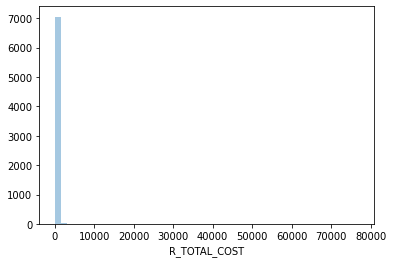

value counts are as follows: 


0.0      2397
10.0      719
100.0     255
50.0      189
8.0       184
         ... 
322.0       1
221.0       1
475.0       1
313.0       1
392.0       1
Name: R_TOTAL_COST, Length: 350, dtype: int64

In [ ]:
#plotting the distribution of the variable with most values
sns.distplot(r_df['R_TOTAL_COST'],kde=False)
plt.show()
print('value counts are as follows: ')
r_df['R_TOTAL_COST'].value_counts()